In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import acf, pacf
from datetime import datetime
from scipy import stats
from scipy.stats import boxcox
import statsmodels.tsa as smt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('train_df_90days.csv')
df.head()

,timestamp,average_gas_fee,avgGas,Bitcoin Price (USD),Ethereum Price (USD)
0,2022-09-12 10:00:00,10.585,92232.945200,22195.69118,1750.655946
1,2022-09-12 11:00:00,30.230,88143.438267,22180.53379,1746.531098
2,2022-09-12 12:00:00,33.410,82982.461422,22292.74291,1751.864674
3,2022-09-12 13:00:00,25.225,84544.989353,22359.17007,1747.678093
4,2022-09-12 14:00:00,52.245,89251.971497,22391.44726,1752.387514


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df.head()

,average_gas_fee,avgGas,Bitcoin Price (USD),Ethereum Price (USD)
timestamp,,,,
2022-09-12 10:00:00,10.585,92232.945200,22195.69118,1750.655946
2022-09-12 11:00:00,30.230,88143.438267,22180.53379,1746.531098
2022-09-12 12:00:00,33.410,82982.461422,22292.74291,1751.864674
2022-09-12 13:00:00,25.225,84544.989353,22359.17007,1747.678093
2022-09-12 14:00:00,52.245,89251.971497,22391.44726,1752.387514


In [4]:
df.columns = ['average_gas_fee', 'avgGas', 'BTCprice', 'ETHprice']
df.head()

,average_gas_fee,avgGas,BTCprice,ETHprice
timestamp,,,,
2022-09-12 10:00:00,10.585,92232.945200,22195.69118,1750.655946
2022-09-12 11:00:00,30.230,88143.438267,22180.53379,1746.531098
2022-09-12 12:00:00,33.410,82982.461422,22292.74291,1751.864674
2022-09-12 13:00:00,25.225,84544.989353,22359.17007,1747.678093
2022-09-12 14:00:00,52.245,89251.971497,22391.44726,1752.387514


In [5]:
df.index

DatetimeIndex(['2022-09-12 10:00:00', '2022-09-12 11:00:00',
               '2022-09-12 12:00:00', '2022-09-12 13:00:00',
               '2022-09-12 14:00:00', '2022-09-12 15:00:00',
               '2022-09-12 16:00:00', '2022-09-12 17:00:00',
               '2022-09-12 18:00:00', '2022-09-12 19:00:00',
               ...
               '2022-12-11 00:00:00', '2022-12-11 01:00:00',
               '2022-12-11 02:00:00', '2022-12-11 03:00:00',
               '2022-12-11 04:00:00', '2022-12-11 05:00:00',
               '2022-12-11 06:00:00', '2022-12-11 07:00:00',
               '2022-12-11 08:00:00', '2022-12-11 09:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=2149, freq=None)

<AxesSubplot:xlabel='timestamp'>

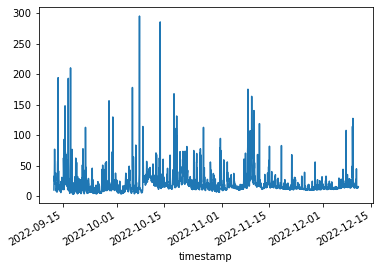

In [6]:
df['average_gas_fee'].plot()

<AxesSubplot:xlabel='timestamp'>

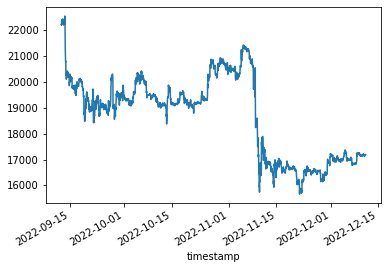

In [7]:
df['BTCprice'].plot()

<AxesSubplot:xlabel='timestamp'>

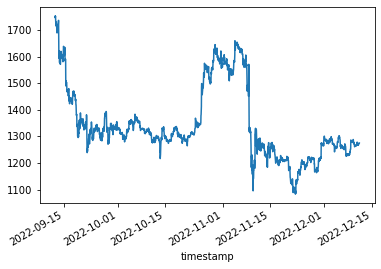

In [8]:
df['ETHprice'].plot()

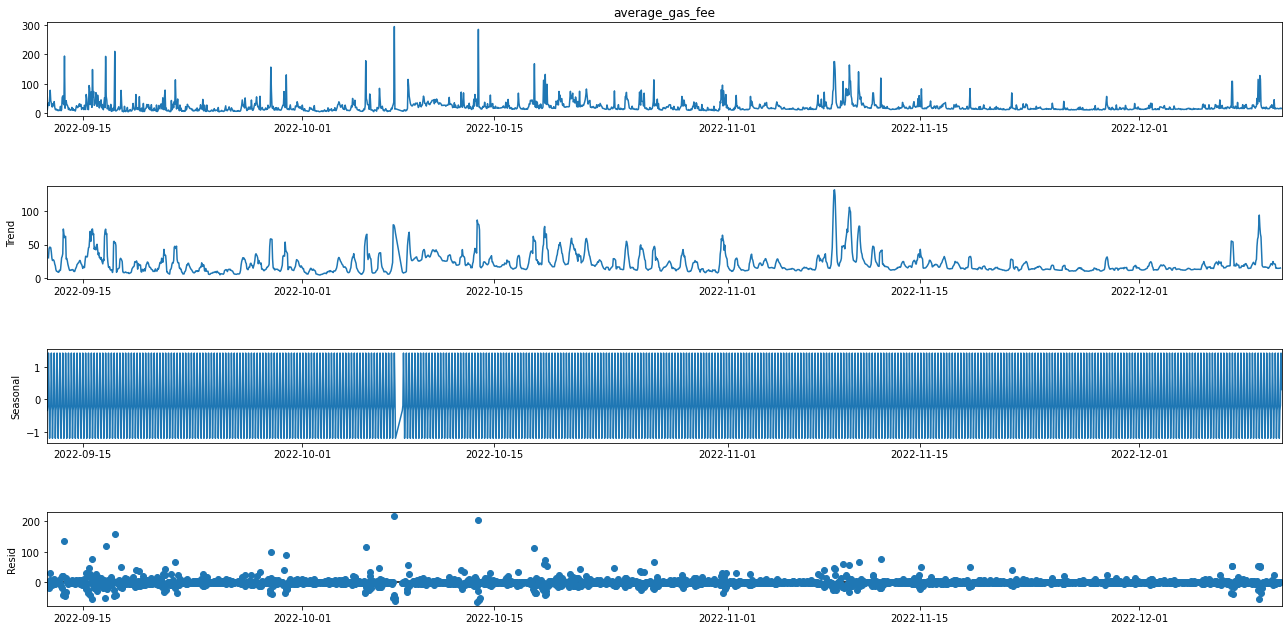

In [9]:
decomposition = sm.tsa.seasonal_decompose(df['average_gas_fee'], model='additive',period=5)

ax = decomposition.plot()
ax.set_size_inches(20,10)

plt.show()

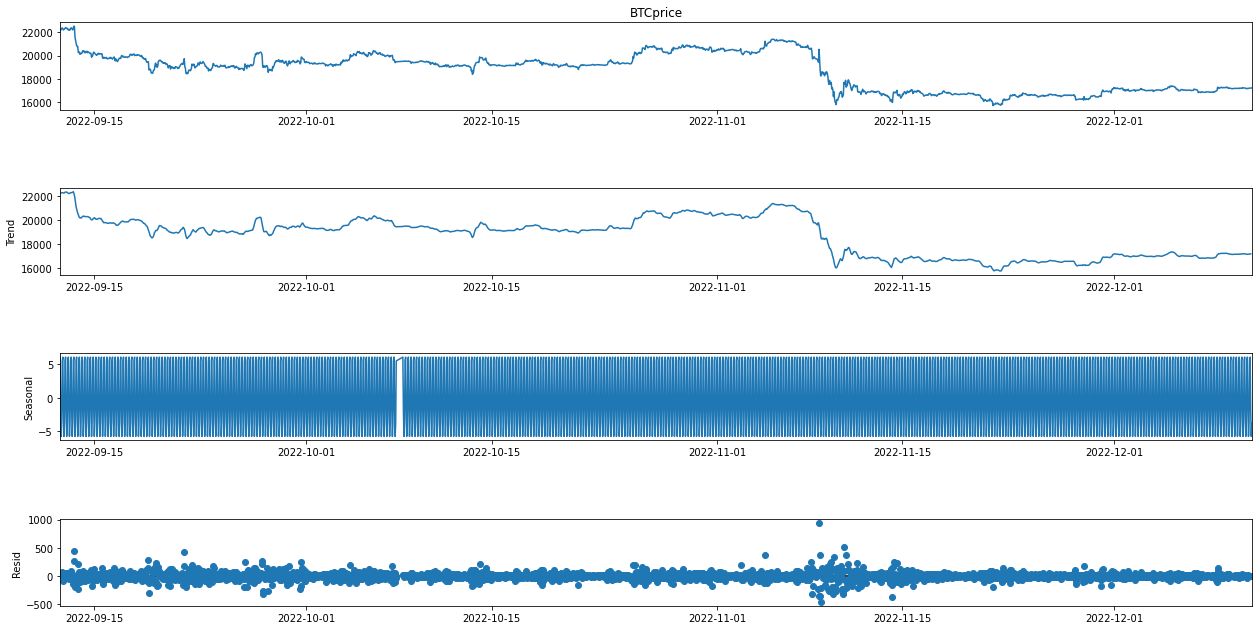

In [10]:
decomposition= sm.tsa.seasonal_decompose(df['BTCprice'], model='additive',period=5)

ax = decomposition.plot()
ax.set_size_inches(20,10)

plt.show()

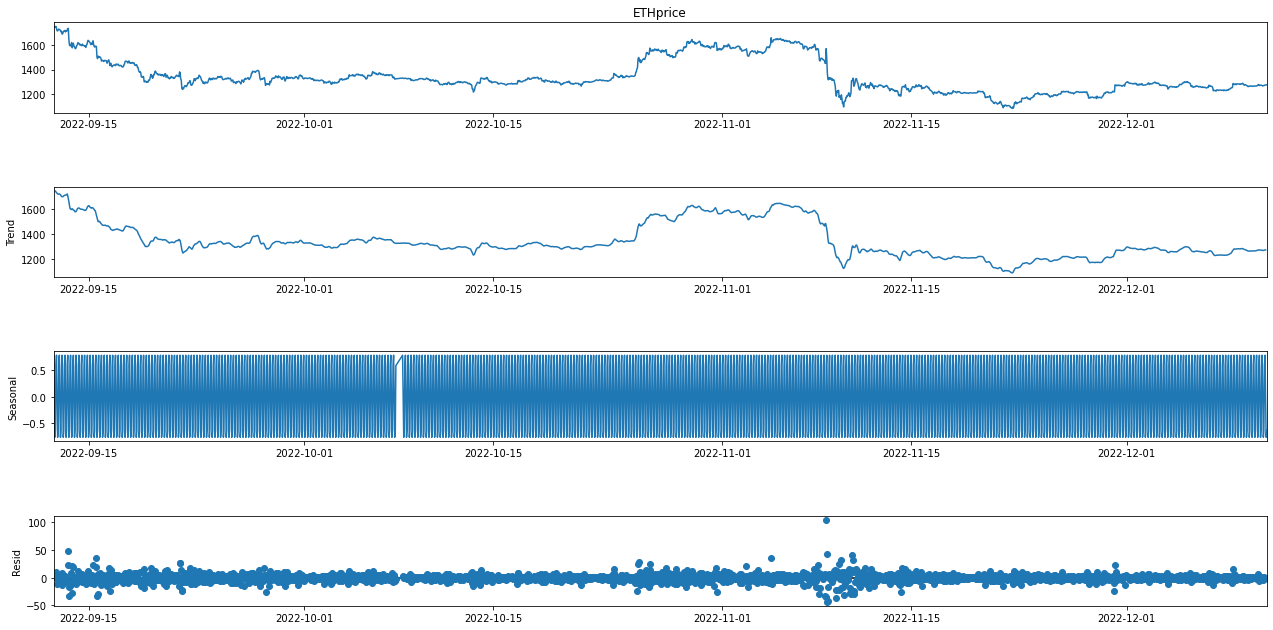

In [11]:
decomposition= sm.tsa.seasonal_decompose(df['ETHprice'], model='additive',period=5)

ax = decomposition.plot()
ax.set_size_inches(20,10)

plt.show()

## Average Gas Fee

In [12]:
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        stats.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

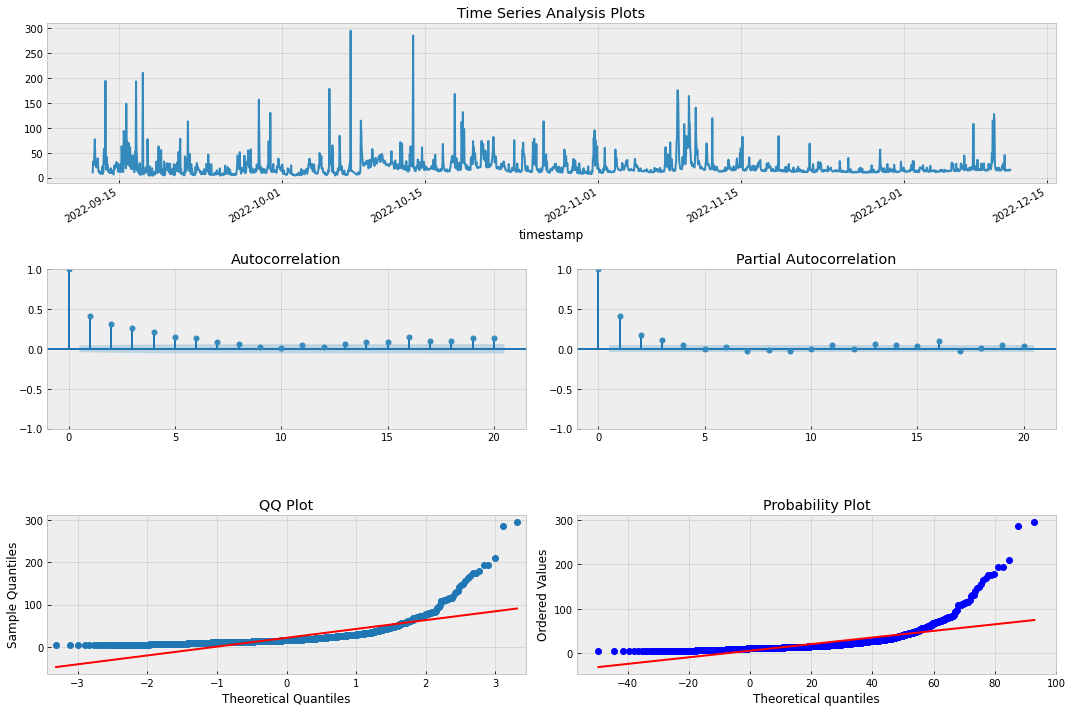

In [13]:
raw_data = tsplot(df['average_gas_fee'], lags=20)

## Bitcoin Price

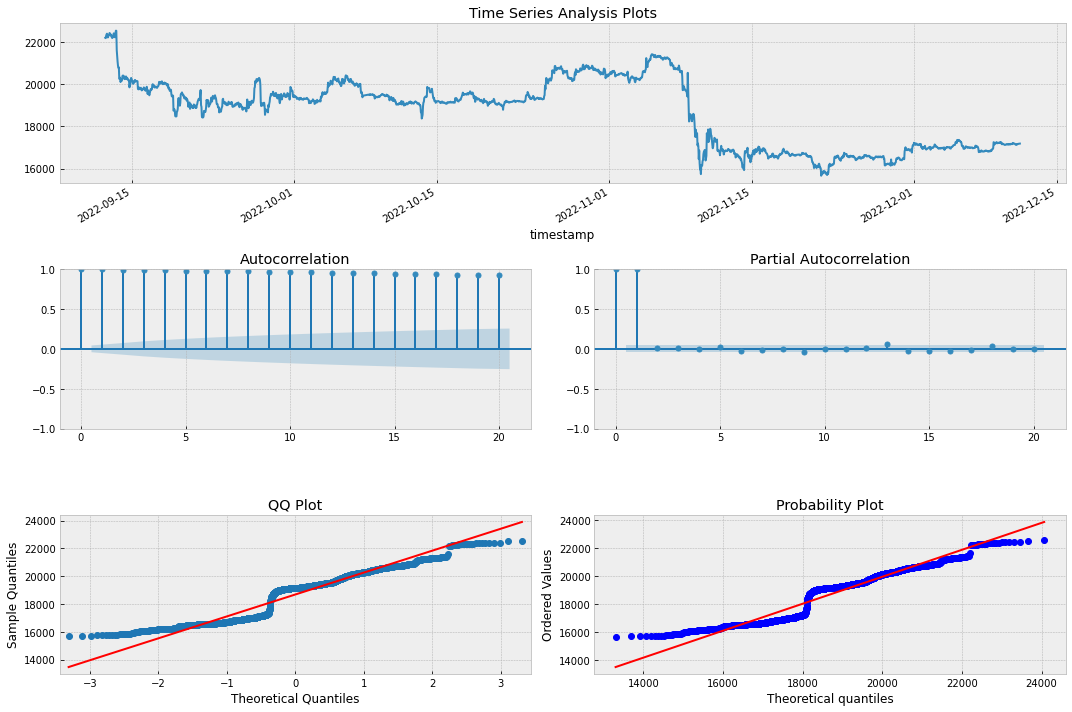

In [14]:
raw_data_BTC = tsplot(df['BTCprice'], lags=20)

## Ethereum Price

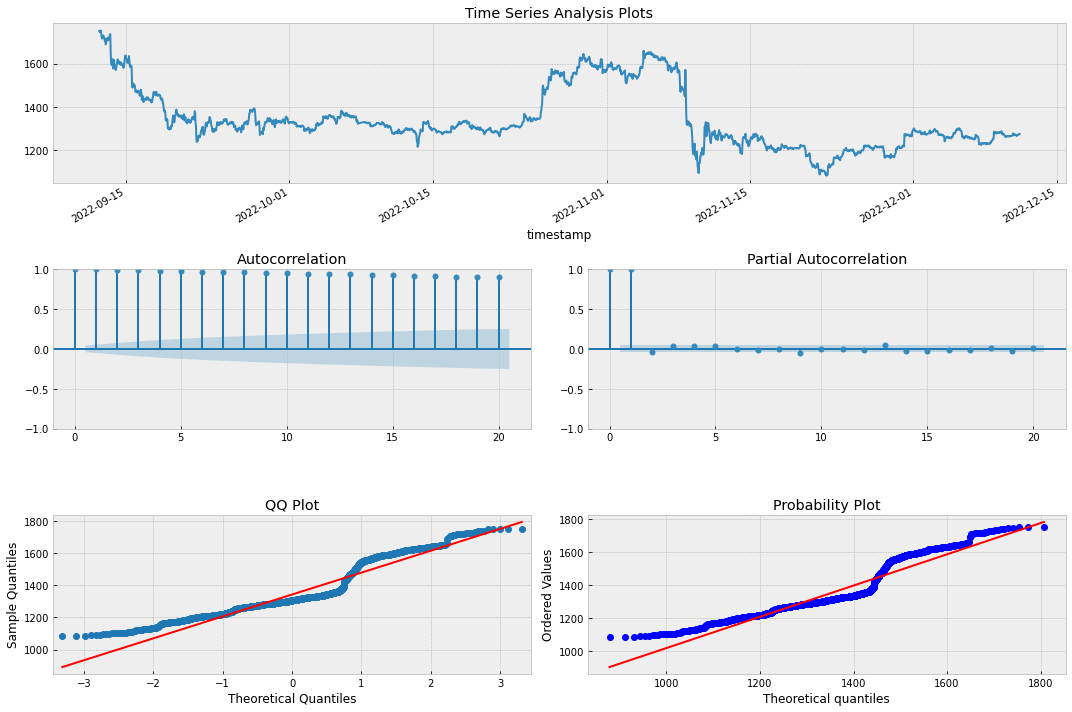

In [15]:
raw_data_ETH = tsplot(df['ETHprice'], lags=20)

# Logarithm & Differencing

## Average gas fee

In [16]:
df_log = np.log(df['average_gas_fee'])

#1st differencing with logarithm
diff_df_log = df_log.diff(periods=1).iloc[1:]

#2nd differencing with logarithm
diff_2_df_log = df_log.diff(periods=2).iloc[2:]

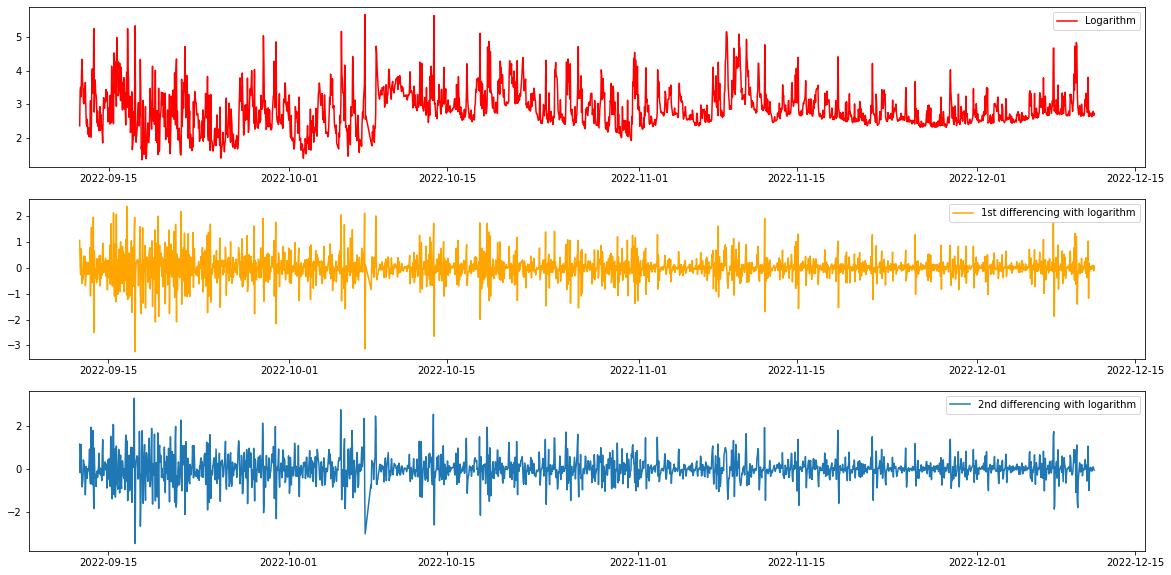

In [17]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(311)
ax1.plot(df_log, color='red')
ax1.legend(['Logarithm'])


ax2 = plt.subplot(312)
ax2.plot(diff_df_log, color='orange')
ax2.legend(['1st differencing with logarithm'])

ax3 =plt.subplot(313)
ax3.plot(diff_2_df_log)
ax3.legend(['2nd differencing with logarithm'])

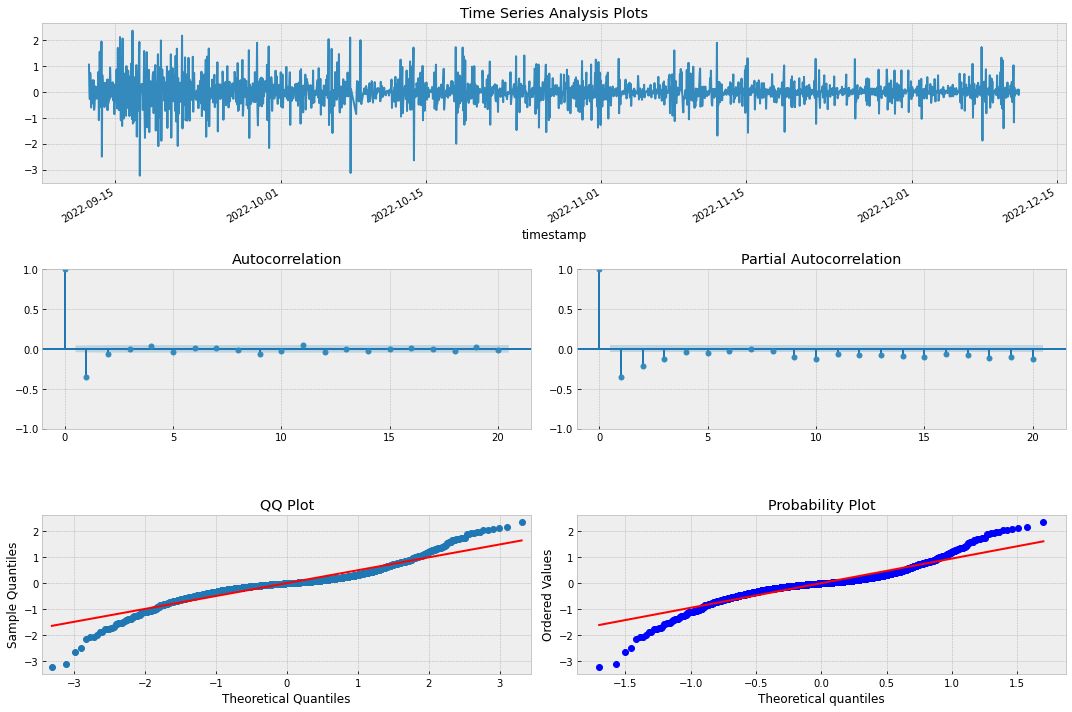

In [18]:
tsplot(diff_df_log, lags=20)

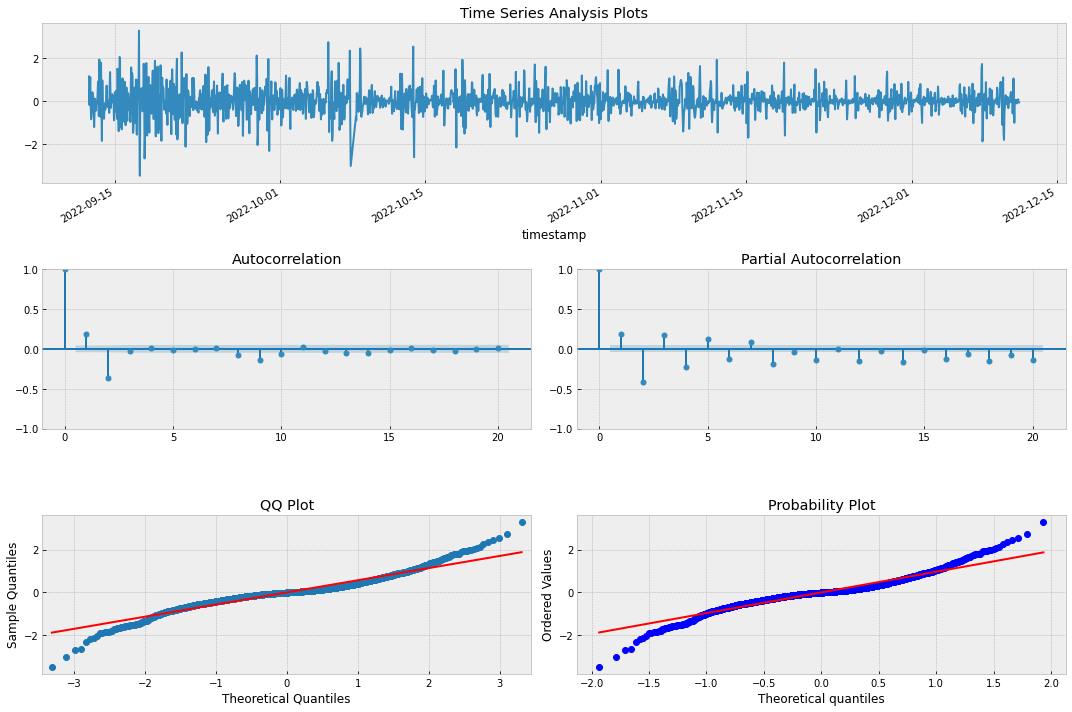

In [19]:
tsplot(diff_2_df_log, lags=20)

In [20]:
adf_test = adfuller(diff_df_log)
adf_test_ = adfuller(diff_2_df_log)

print('---1st differencing with logarithm---')
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %20.20f' % adf_test[1])


print('\n---2nd differencing with logarithm---')
print('ADF Statistic: %f' % adf_test_[0])
print('Critical Values @ 0.05: %.2f' % adf_test_[4]['5%'])
print('p-value: %20.20f' % adf_test_[1])

---1st differencing with logarithm---
ADF Statistic: -14.336979
Critical Values @ 0.05: -2.86
p-value: 0.00000000000000000000

---2nd differencing with logarithm---
ADF Statistic: -12.603343
Critical Values @ 0.05: -2.86
p-value: 0.00000000000000000000


## Bitcoin Price

In [21]:
df_log_BTC = np.log(df['BTCprice'])

#1st differencing with logarithm
diff_df_log_BTC = df_log_BTC.diff(periods=1).iloc[1:]

#2nd differencing with logarithm
diff_2_df_log_BTC = df_log_BTC.diff(periods=2).iloc[2:]

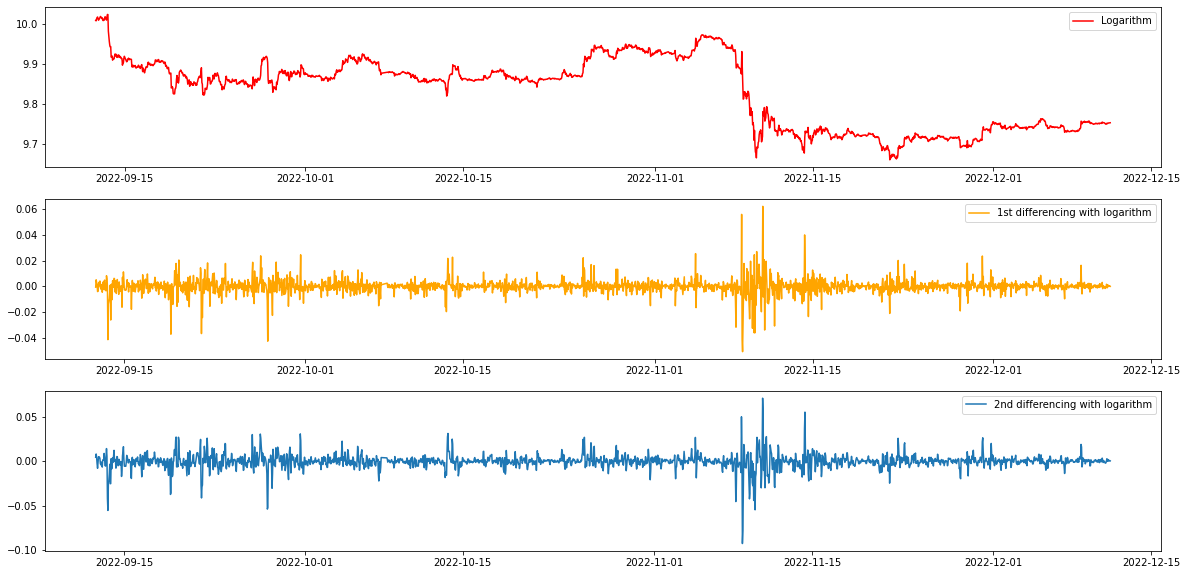

In [22]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(311)
ax1.plot(df_log_BTC, color='red')
ax1.legend(['Logarithm'])


ax2 = plt.subplot(312)
ax2.plot(diff_df_log_BTC, color='orange')
ax2.legend(['1st differencing with logarithm'])

ax3 =plt.subplot(313)
ax3.plot(diff_2_df_log_BTC)
ax3.legend(['2nd differencing with logarithm'])

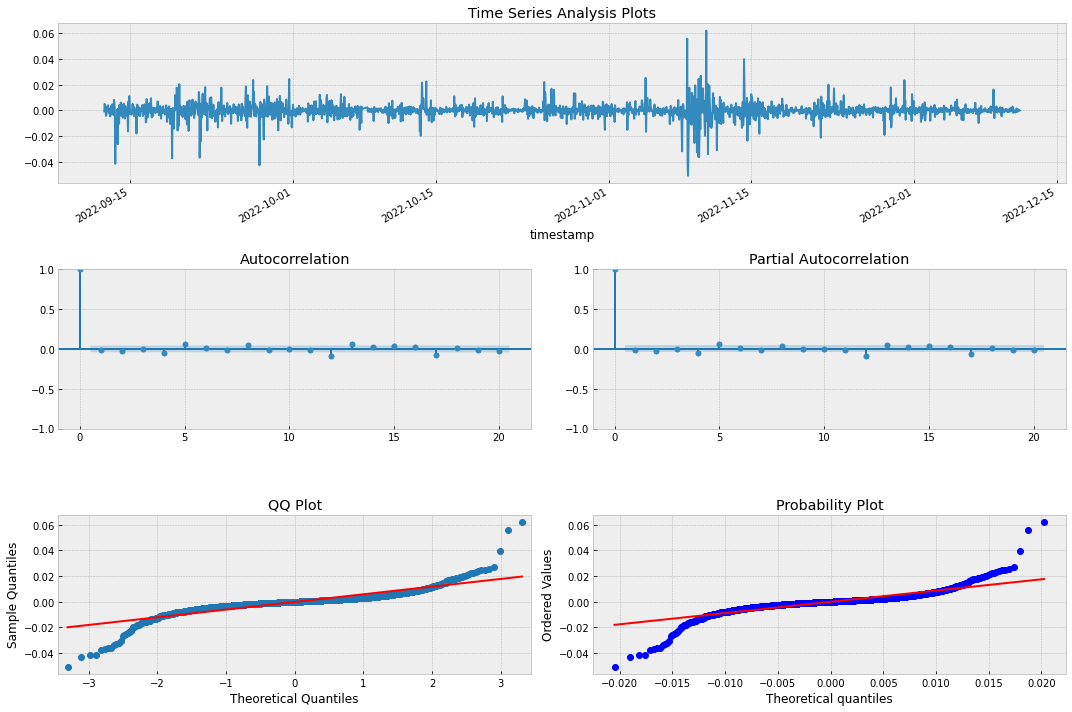

In [23]:
tsplot(diff_df_log_BTC, lags=20)

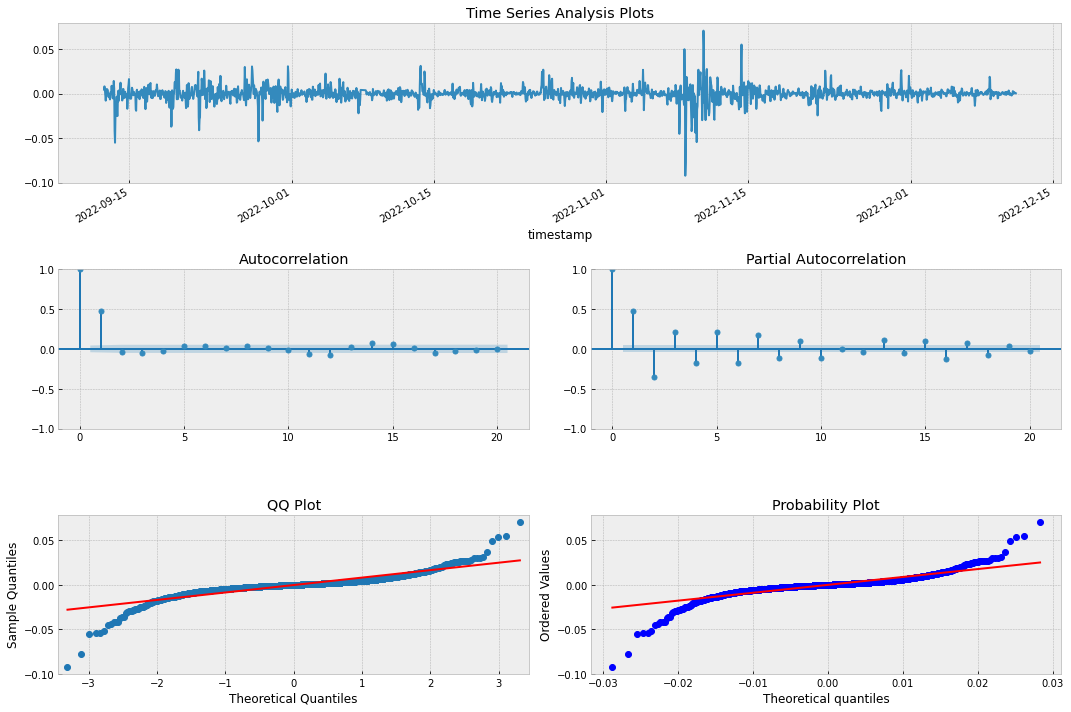

In [24]:
tsplot(diff_2_df_log_BTC, lags=20)

In [25]:
adf_test = adfuller(diff_df_log_BTC)
adf_test_ = adfuller(diff_2_df_log_BTC)

print('---1st differencing with logarithm---')
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %20.20f' % adf_test[1])


print('\n---2nd differencing with logarithm---')
print('ADF Statistic: %f' % adf_test_[0])
print('Critical Values @ 0.05: %.2f' % adf_test_[4]['5%'])
print('p-value: %20.20f' % adf_test_[1])

---1st differencing with logarithm---
ADF Statistic: -11.234864
Critical Values @ 0.05: -2.86
p-value: 0.00000000000000000002

---2nd differencing with logarithm---
ADF Statistic: -9.440361
Critical Values @ 0.05: -2.86
p-value: 0.00000000000000049135


## Ethereum Price

In [26]:
df_log_ETH = np.log(df['ETHprice'])

#1st differencing with logarithm
diff_df_log_ETH = df_log_ETH.diff(periods=1).iloc[1:]

#2nd differencing with logarithm
diff_2_df_log_ETH = df_log_ETH.diff(periods=2).iloc[2:]

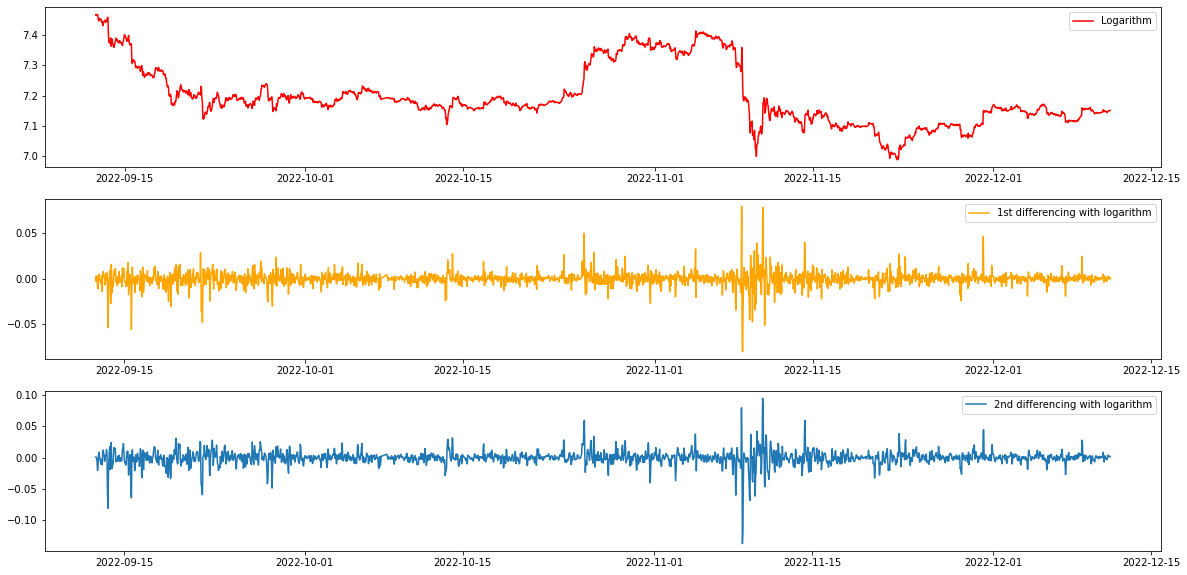

In [27]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(311)
ax1.plot(df_log_ETH, color='red')
ax1.legend(['Logarithm'])


ax2 = plt.subplot(312)
ax2.plot(diff_df_log_ETH, color='orange')
ax2.legend(['1st differencing with logarithm'])

ax3 =plt.subplot(313)
ax3.plot(diff_2_df_log_ETH)
ax3.legend(['2nd differencing with logarithm'])

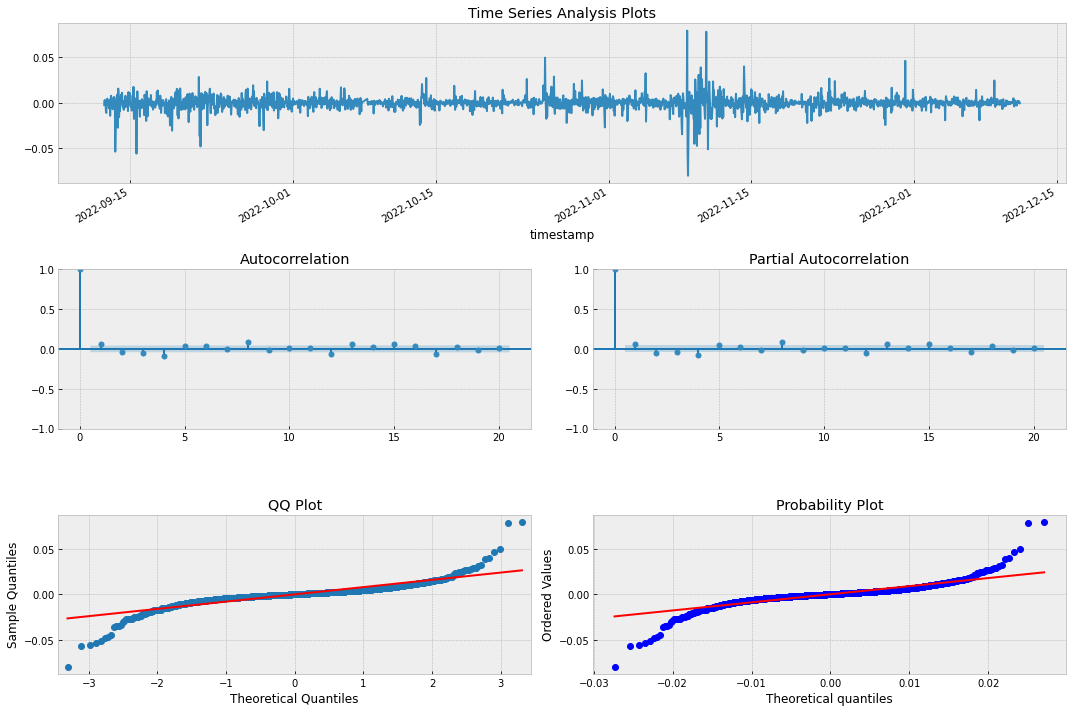

In [28]:
tsplot(diff_df_log_ETH, lags=20)

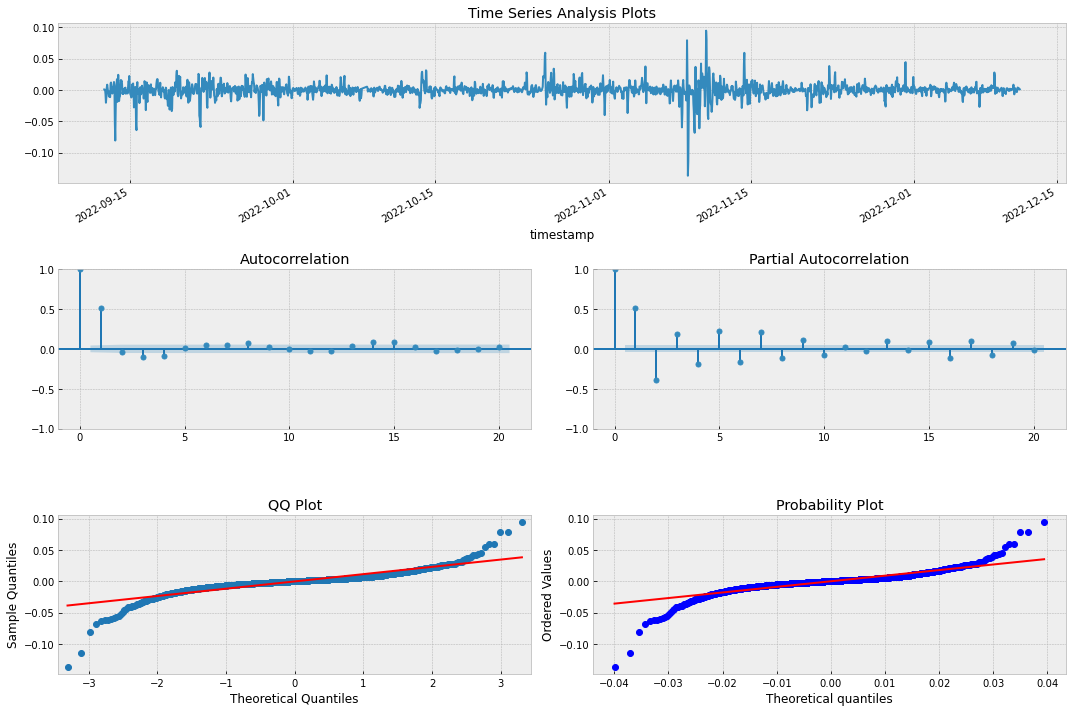

In [29]:
tsplot(diff_2_df_log_ETH, lags=20)

In [30]:
adf_test = adfuller(diff_df_log_ETH)
adf_test_ = adfuller(diff_2_df_log_ETH)

print('---1st differencing with logarithm---')
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %20.20f' % adf_test[1])


print('\n---2nd differencing with logarithm---')
print('ADF Statistic: %f' % adf_test_[0])
print('Critical Values @ 0.05: %.2f' % adf_test_[4]['5%'])
print('p-value: %20.20f' % adf_test_[1])

---1st differencing with logarithm---
ADF Statistic: -9.262764
Critical Values @ 0.05: -2.86
p-value: 0.00000000000000139271

---2nd differencing with logarithm---
ADF Statistic: -8.549939
Critical Values @ 0.05: -2.86
p-value: 0.00000000000009281830


# Hourly

## Average gas fee

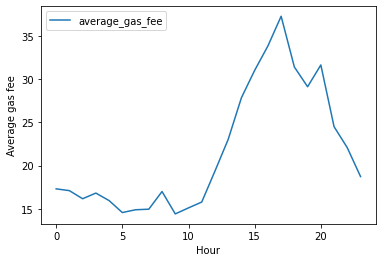

In [31]:
df.groupby(df.index.hour)[['average_gas_fee']].mean().plot()
plt.xlabel('Hour')
plt.ylabel('Average gas fee')
plt.show()

In [32]:
df.groupby(df.index.hour)[['average_gas_fee']].mean()[:12].mean()

average_gas_fee    15.822902
dtype: float64

In [33]:
df.groupby(df.index.hour)[['average_gas_fee']].mean()[12:].mean()

average_gas_fee    27.503294
dtype: float64

## Bitcoin Price

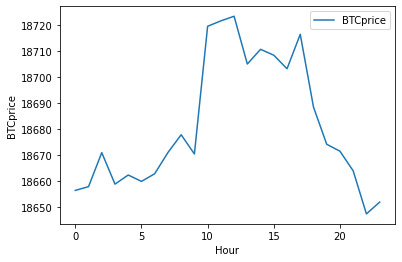

In [34]:
df.groupby(df.index.hour)[['BTCprice']].mean().plot()
plt.xlabel('Hour')
plt.ylabel('BTCprice')
plt.show()

In [35]:
df.groupby(df.index.hour)[['BTCprice']].mean()[:12].mean()

BTCprice    18674.157614
dtype: float64

In [36]:
df.groupby(df.index.hour)[['BTCprice']].mean()[12:].mean()

BTCprice    18688.749068
dtype: float64

## Ethereum Price

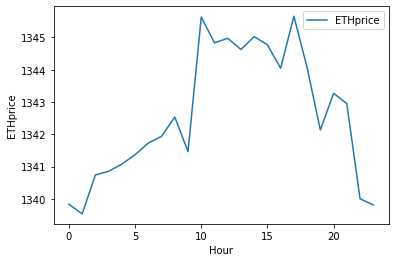

In [37]:
df.groupby(df.index.hour)[['ETHprice']].mean().plot()
plt.xlabel('Hour')
plt.ylabel('ETHprice')
plt.show()

In [38]:
df.groupby(df.index.hour)[['ETHprice']].mean()[:12].mean()

ETHprice    1341.795866
dtype: float64

In [39]:
df.groupby(df.index.hour)[['ETHprice']].mean()[12:].mean()

ETHprice    1343.444153
dtype: float64

# Correlation between average_gas_fee, BTCprice, and ETHprice

In [40]:
df

,average_gas_fee,avgGas,BTCprice,ETHprice
timestamp,,,,
2022-09-12 10:00:00,10.5850,92232.945200,22195.69118,1750.655946
2022-09-12 11:00:00,30.2300,88143.438267,22180.53379,1746.531098
2022-09-12 12:00:00,33.4100,82982.461422,22292.74291,1751.864674
2022-09-12 13:00:00,25.2250,84544.989353,22359.17007,1747.678093
2022-09-12 14:00:00,52.2450,89251.971497,22391.44726,1752.387514
...,...,...,...,...
2022-12-11 05:00:00,15.0511,166736.391980,17177.70161,1270.787620
2022-12-11 06:00:00,14.9330,157472.907955,17177.26840,1273.466338
2022-12-11 07:00:00,16.3310,115399.969702,17182.10721,1274.061867


In [41]:
df1 = df[['average_gas_fee', 'BTCprice', 'ETHprice']]
df1

,average_gas_fee,BTCprice,ETHprice
timestamp,,,
2022-09-12 10:00:00,10.5850,22195.69118,1750.655946
2022-09-12 11:00:00,30.2300,22180.53379,1746.531098
2022-09-12 12:00:00,33.4100,22292.74291,1751.864674
2022-09-12 13:00:00,25.2250,22359.17007,1747.678093
2022-09-12 14:00:00,52.2450,22391.44726,1752.387514
...,...,...,...
2022-12-11 05:00:00,15.0511,17177.70161,1270.787620
2022-12-11 06:00:00,14.9330,17177.26840,1273.466338
2022-12-11 07:00:00,16.3310,17182.10721,1274.061867


In [42]:
df1.corr().style.background_gradient()

,average_gas_fee,BTCprice,ETHprice
average_gas_fee,1.000000,0.059265,0.026005
BTCprice,0.059265,1.000000,0.862430
ETHprice,0.026005,0.862430,1.000000


There are strong positive correlation between BTC price and ETH price.
But It seems average_gas_fee is non-correlated with other variables..